In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Generate normal data (sine wave)
t = np.linspace(0, 100, 1000)
normal_data = np.sin(t) + 0.1 * np.random.randn(1000)

In [3]:
# Introduce anomalies (random spikes)
anomaly_indices = np.random.choice(1000, 50, replace=False)
anomalies = normal_data.copy()
anomalies[anomaly_indices] += np.random.uniform(3, 5, size=50)

In [4]:
# Combine normal and anomaly data
data = np.concatenate([normal_data, anomalies]).reshape(-1, 1)

In [5]:
# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Split data into training (normal only) and testing (normal + anomalies)
X_train, X_test = train_test_split(data_scaled[:1000], test_size=0.2, random_state=42)
X_test = np.concatenate([X_test, data_scaled[1000:]])  # Add anomalies to test set

In [7]:
# Fit KNN model (using NearestNeighbors)
n_neighbors = 20
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(X_train)

,n_neighbors,20
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,n_jobs,None


In [8]:
# Compute average distance to k nearest neighbors for each test sample
distances, _ = knn.kneighbors(X_test)
anomaly_scores = distances.mean(axis=1)

In [9]:
# Set threshold (mean + 3*std of scores)
threshold = anomaly_scores.mean() + 3 * anomaly_scores.std()
anomalies = anomaly_scores > threshold

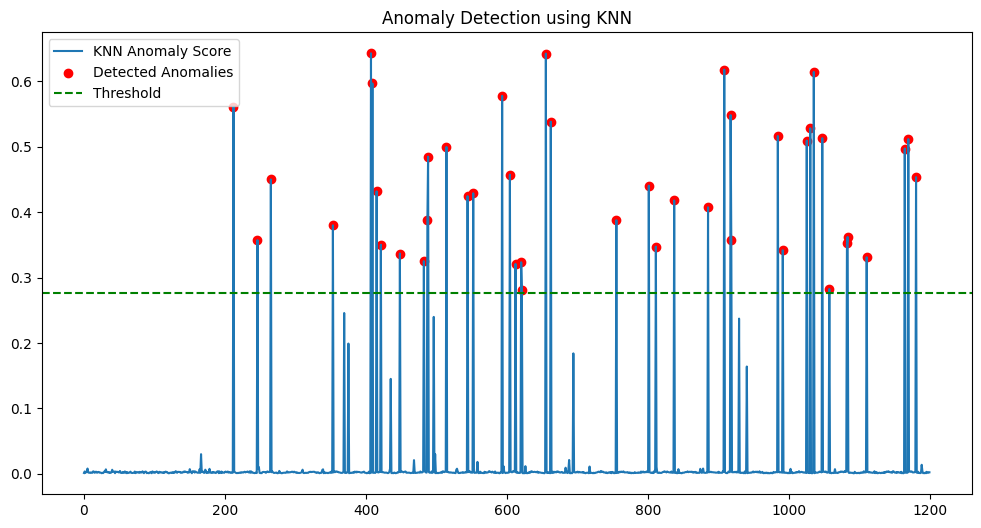

In [10]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(anomaly_scores, label="KNN Anomaly Score")
plt.scatter(np.where(anomalies)[0], anomaly_scores[anomalies], color='r', label="Detected Anomalies")
plt.axhline(y=threshold, color='g', linestyle='--', label="Threshold")
plt.legend()
plt.title("Anomaly Detection using KNN")
plt.show()

In [11]:
print(f"Total anomalies detected: {np.sum(anomalies)}")

Total anomalies detected: 43
